<a href="https://colab.research.google.com/github/gye152/ML---Hiyerarsik-Kumeleme-/blob/main/notebooks/KMeansClustering/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

normallik varsayım testi

box cox transformation y üzeri kaç dönüşüm yapmam gerektiğini söyler.



# KÜTÜPHANELERİN İMPORT EDİLMESİ

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# VERİYİ İNCELEME

In [ ]:
df = pd.read_csv('flo_data_20k.csv')

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [ ]:
df.shape

(19945, 12)

In [ ]:
df.isnull().sum()

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
datetime = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
for i in datetime:
    df[i] = pd.to_datetime(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [ ]:
df.describe(include=np.float64).T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13


Tenure → Müşteri ne kadar süredir var (uzun vadeli ilişki süresi).

Recency → Son siparişin üzerinden ne kadar geçti (güncel ilişki).

Purchase Frequency (Sipariş Sıklığı) → Uzun vadeli sipariş alışkanlığı.

Intensity → Kısa vadeli, güncel sipariş aktivitesi.

In [ ]:
today_date = dt.datetime(2021,6,1)

df["recency"] = (today_date - df["last_order_date"]).dt.days

df["tenure"] = (df["last_order_date"] - df["first_order_date"]).dt.days

# Toplam sipariş ve toplam harcama
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

# Purchase Frequency (purchase_frequency = total_orders / tenure)
df["purchase_frequency"] = df["order_num_total"] / (df["tenure"] + 1)

# Intensity (intensity = total_orders / recency)
df["intensity"] = df["order_num_total"] / (df["recency"] + 1)

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],95,119,5.00,939.37,0.04,0.05
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,21.00,2013.55,0.01,0.20
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",186,366,5.00,585.32,0.01,0.03
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,2.00,121.97,0.17,0.01
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],86,582,2.00,209.98,0.00,0.02


In [ ]:
df_copy = df.copy()

df_copy.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],95,119,5.00,939.37,0.04,0.05
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,21.00,2013.55,0.01,0.20
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",186,366,5.00,585.32,0.01,0.03
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,2.00,121.97,0.17,0.01
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],86,582,2.00,209.98,0.00,0.02


In [ ]:
df_copy.drop(["order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline", "customer_value_total_ever_online"], axis=1, inplace=True)

df_copy.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,interested_in_categories_12,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,[KADIN],95,119,5.00,939.37,0.04,0.05
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,21.00,2013.55,0.01,0.20
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,"[ERKEK, KADIN]",186,366,5.00,585.32,0.01,0.03
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,"[AKTIFCOCUK, COCUK]",135,11,2.00,121.97,0.17,0.01
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,[AKTIFSPOR],86,582,2.00,209.98,0.00,0.02


# AYKIRI DEĞER ANALİZİ

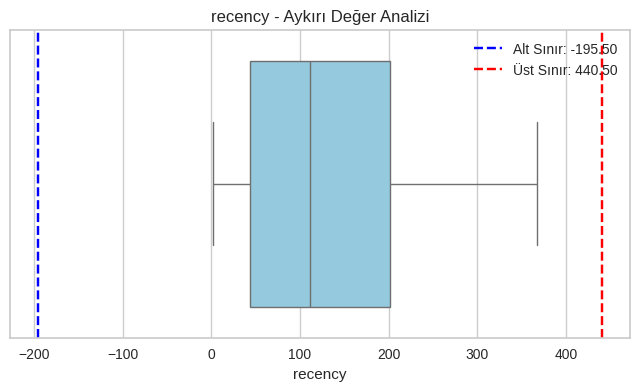


▶ recency: 0 aykırı değer bulundu.


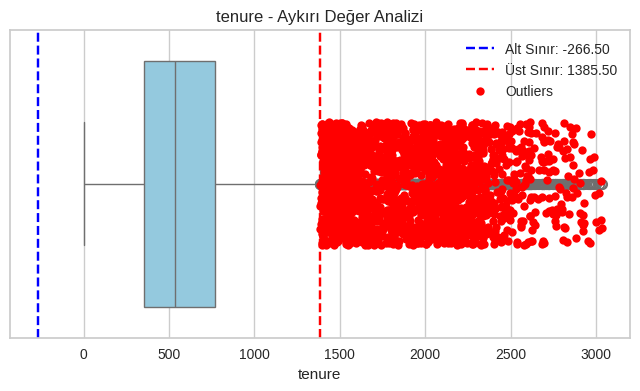


▶ tenure: 2048 aykırı değer bulundu.
Aykırı değerler:
[1469 2145 2828 ... 1482 1787 2054]



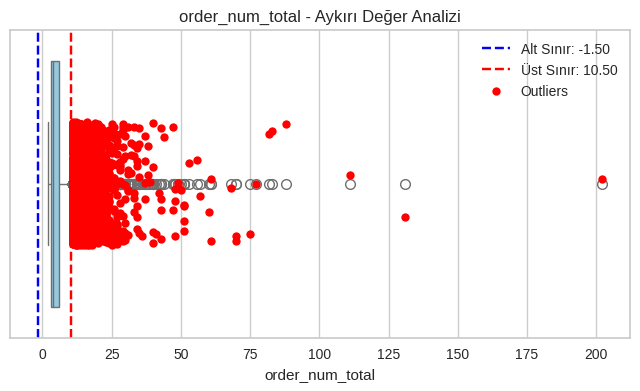


▶ order_num_total: 1399 aykırı değer bulundu.
Aykırı değerler:
[21. 20. 24. ... 20. 11. 12.]



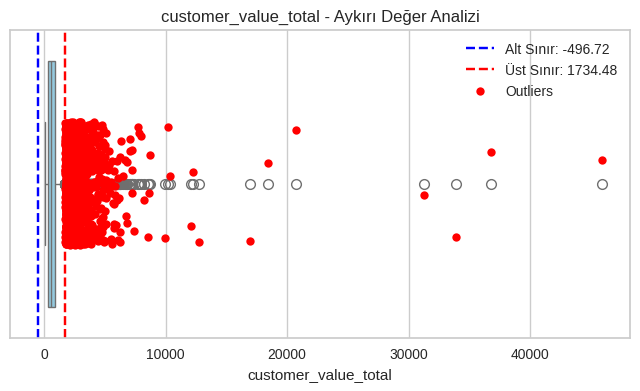


▶ customer_value_total: 1275 aykırı değer bulundu.
Aykırı değerler:
[2013.55 2861.6  4413.29 ... 2345.22 2102.94 1745.48]



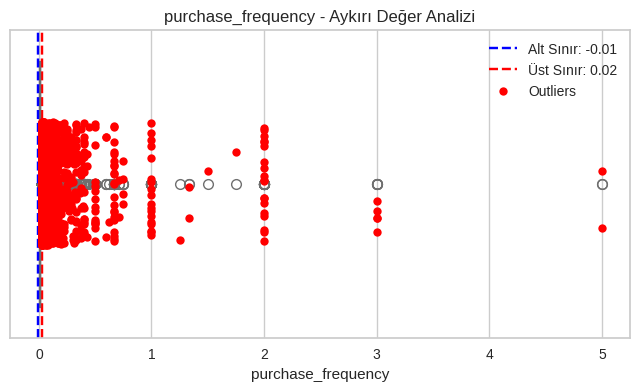


▶ purchase_frequency: 1734 aykırı değer bulundu.
Aykırı değerler:
[0.04166667 0.16666667 0.28571429 ... 0.03743316 0.75       0.02816901]



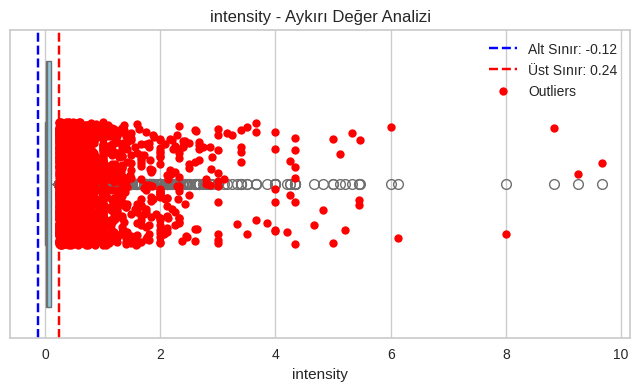


▶ intensity: 2499 aykırı değer bulundu.
Aykırı değerler:
[1.42857143 8.         0.32       ... 0.875      0.72727273 0.33333333]



In [ ]:
def outlier_thresholds(df_copy, col):
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return low, high

def check_outliers(df_copy, col):
    low, high = outlier_thresholds(df_copy, col)
    outliers = df_copy[(df_copy[col] < low) | (df_copy[col] > high)][col]
    return outliers, low, high

def visualize_outliers(df_copy):
    numeric_cols = df_copy.select_dtypes(include=["int64", "float64"]).columns

    for col in numeric_cols:
        outliers, low, high = check_outliers(df_copy, col)

        plt.figure(figsize=(8,4))
        sns.boxplot(x=df_copy[col], color="skyblue")

        # Alt ve üst sınırları çiz
        plt.axvline(low, color="blue", linestyle="--", label=f"Alt Sınır: {low:.2f}")
        plt.axvline(high, color="red", linestyle="--", label=f"Üst Sınır: {high:.2f}")

        # Aykırı değerleri kırmızı nokta ile göster
        if not outliers.empty:
            sns.stripplot(x=outliers, color="red", size=6, jitter=0.2, label="Outliers")

        plt.title(f"{col} - Aykırı Değer Analizi")
        plt.legend()
        plt.show()

        print(f"\n▶ {col}: {len(outliers)} aykırı değer bulundu.")
        if not outliers.empty:
            print(f"Aykırı değerler:\n{outliers.values}\n")

visualize_outliers(df_copy)

In [ ]:
df_main = df_copy.copy()

# winsorization (uç değerleri belli bir yüzdeye göre baskılama/kırpma)

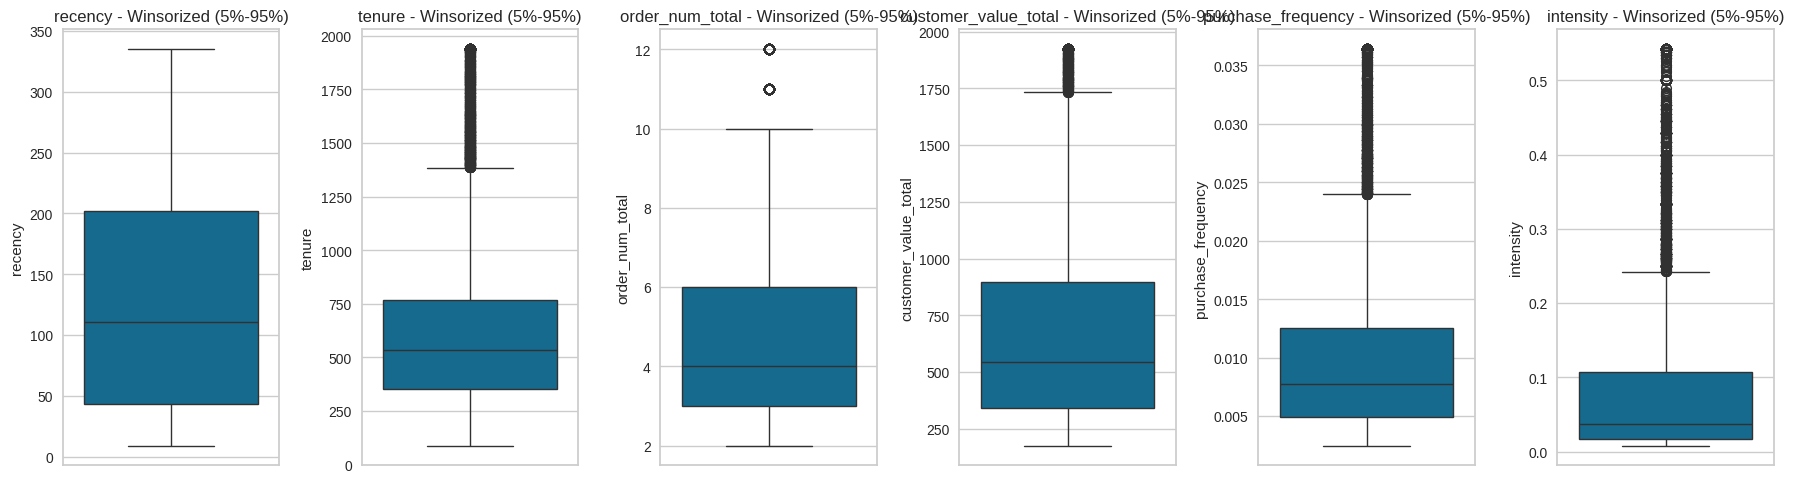

In [ ]:
# Tüm sayısal sütunlar
num_cols = df_copy.select_dtypes(include=["int64", "float64"]).columns

# Alt %5, üst %5 kırpma
for col in num_cols:
    df_copy[col] = winsorize(df_copy[col], limits=[0.05, 0.05])

# Görselleştirme
fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_copy[col], ax=axes[i])
    axes[i].set_title(f"{col} - Winsorized (5%-95%)")

plt.tight_layout()
plt.show()

In [ ]:
model_df = df_copy.select_dtypes(include=["int64", "float64"])
model_df.head()

,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,95,119,5.00,939.37,0.04,0.05
1,105,1469,12.00,1921.94,0.01,0.20
2,186,366,5.00,585.32,0.01,0.03
3,135,88,2.00,175.48,0.04,0.01
4,86,582,2.00,209.98,0.00,0.02


grab_col_names

list_comprehension

sayısal sütunların ayrıştırılması



# SAYISAL SÜTUNLARIN ÇARPIKLIĞI VE GÖRSELLEŞTİRİLMESİ

## Winsorized yapılmadan önceki çarpıklık

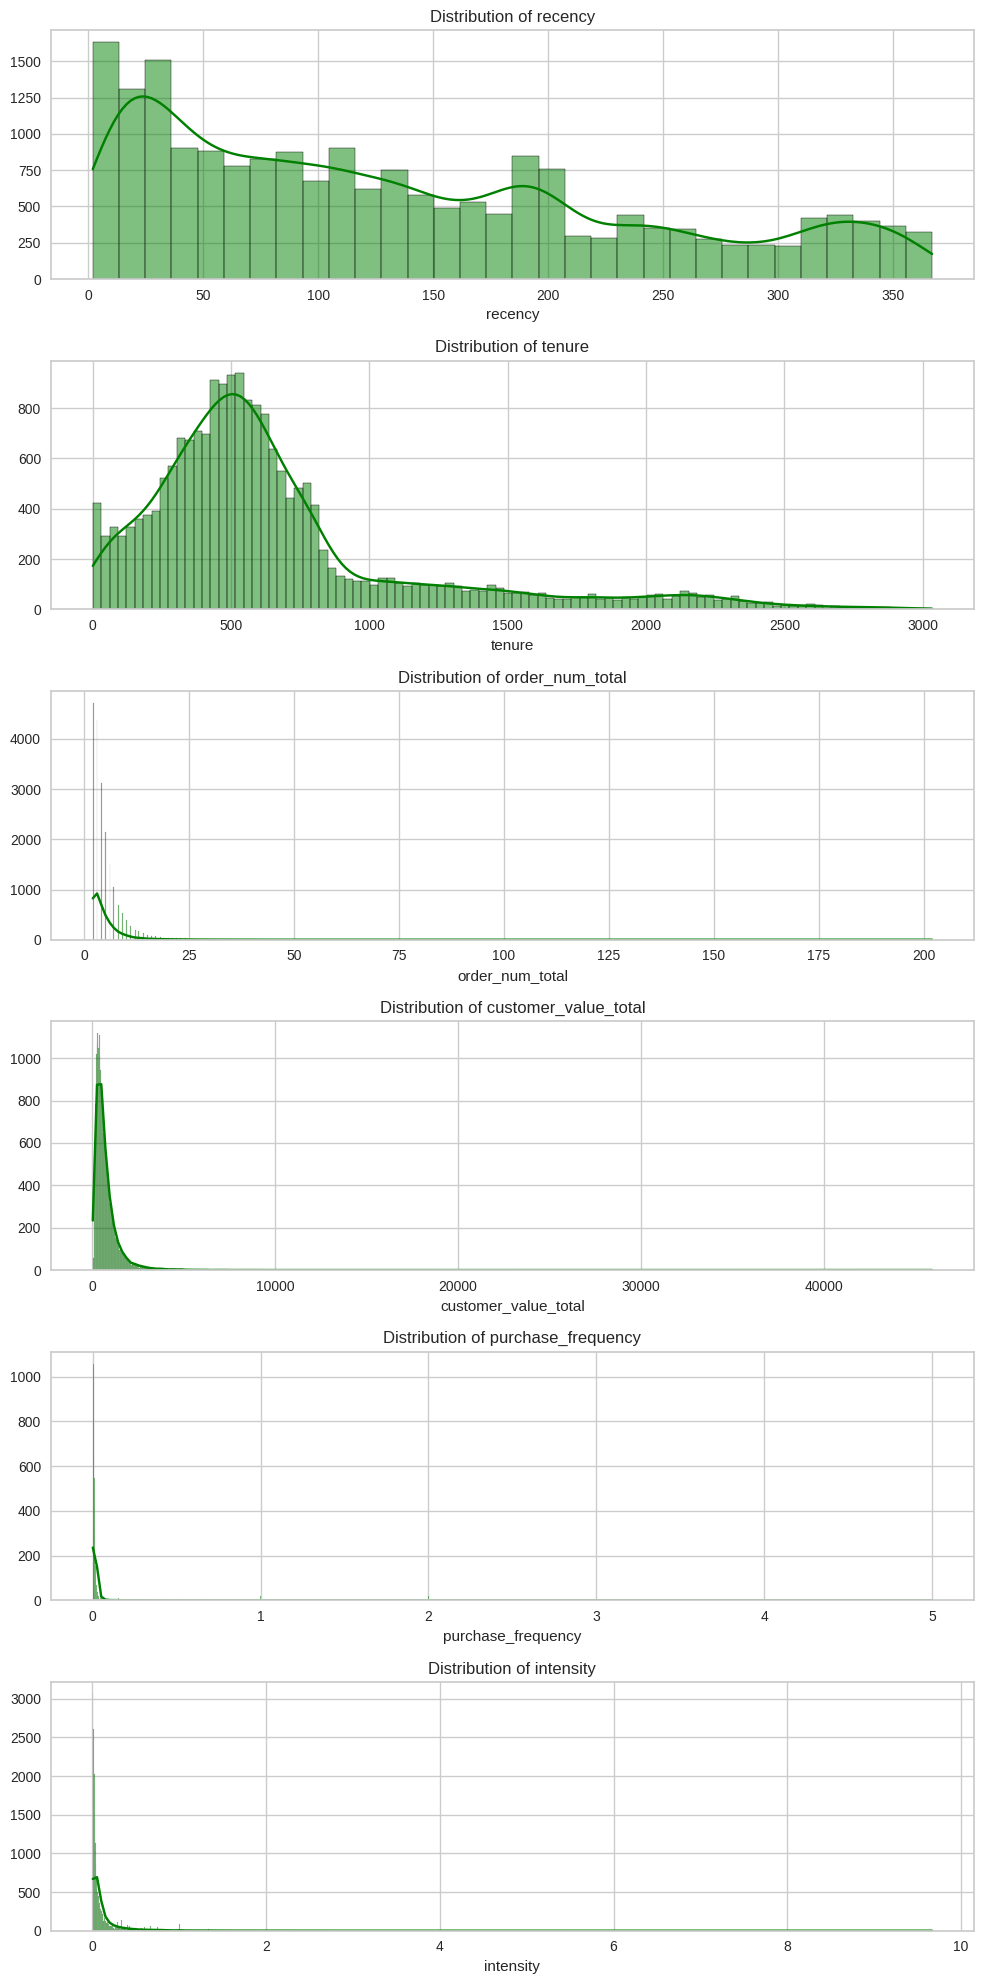

In [ ]:
# Sayısal sütunları seç
numeric_cols = df_main.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df_main[col], kde=True, color="green")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

## Winsorized yapıldıktan sonraki çarpıklık

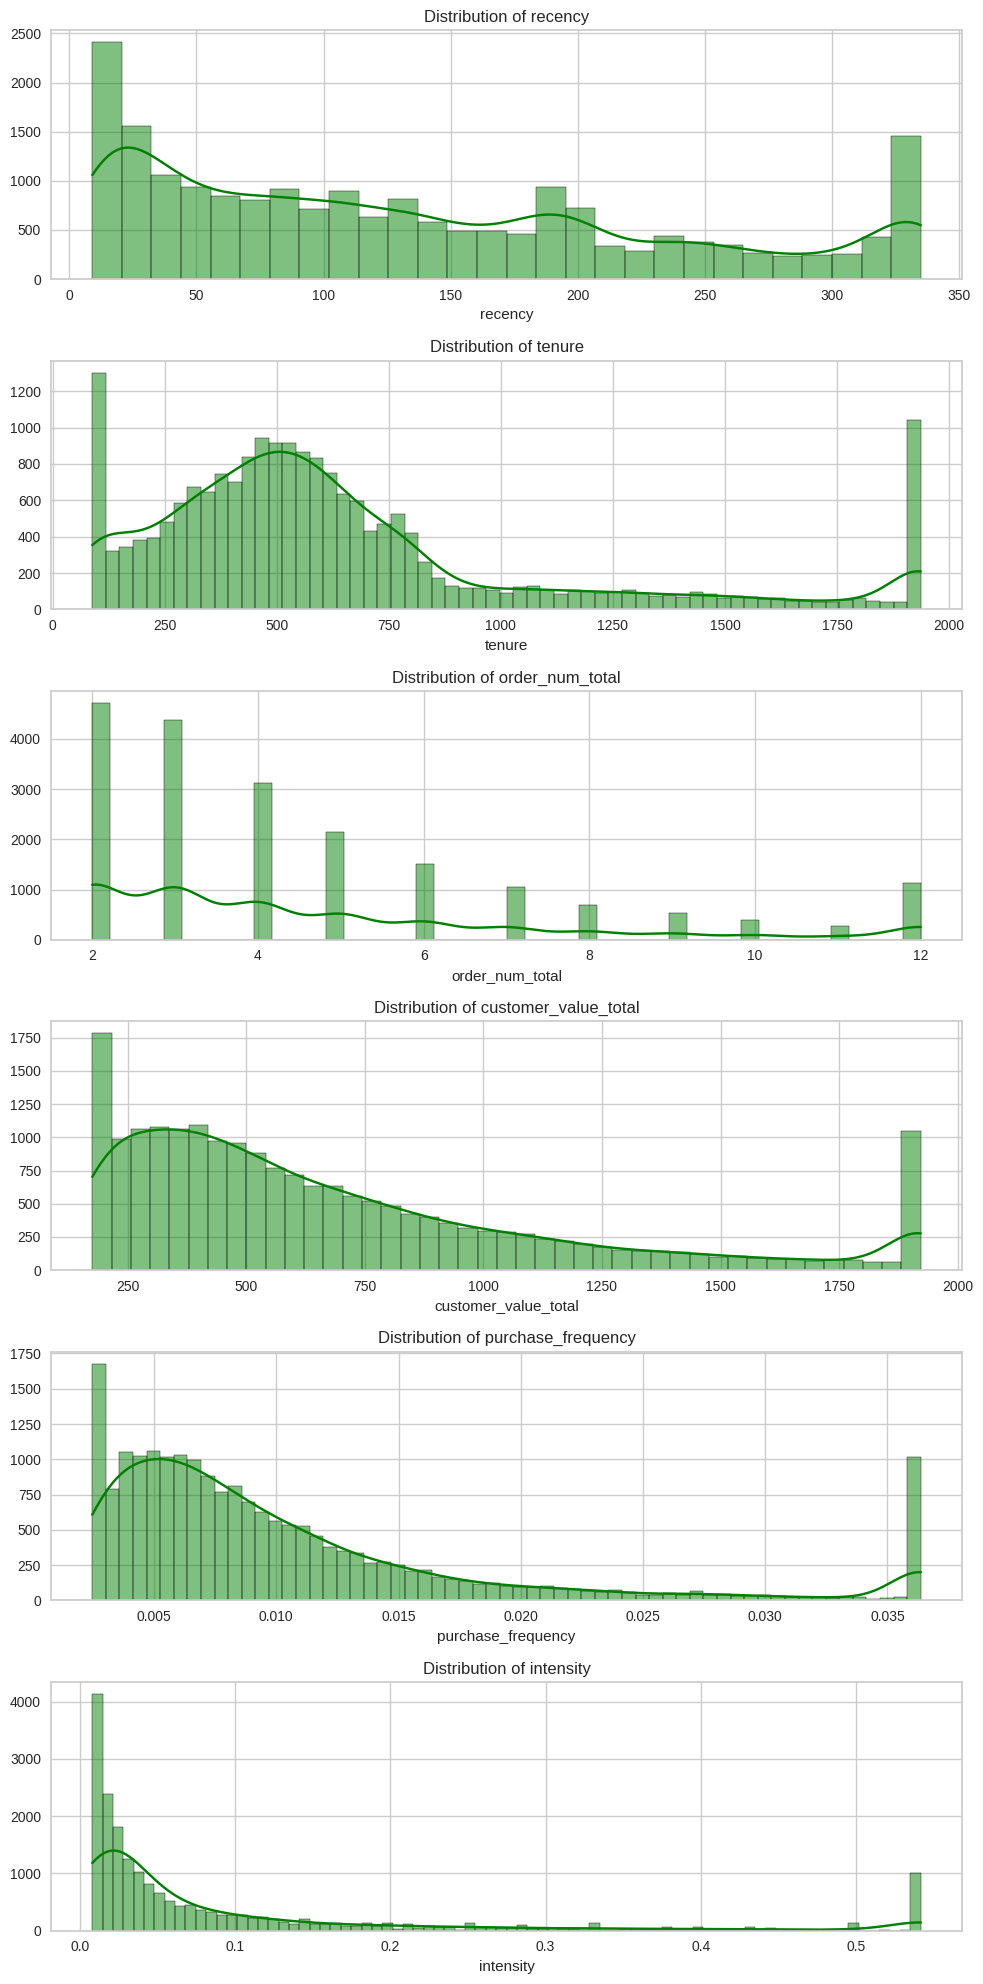

In [ ]:
# Sayısal sütunları seç
numeric_cols = model_df.columns

plt.figure(figsize=(10, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(model_df[col], kde=True, color="green")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

# STANDARTLAŞTIRMA ve Log Dönüşümü

Log dönüşümü yapmamızın sebebi sağa çarpıklık olmasından dolayı. Bu modeli kötü etkileyebilir çünkü modelimiz mesafeye duyarlıdır.

## Winsorize yapıldıktan sonraki log dönüşümü sonuçları

In [ ]:
# Log dönüşümü (np.log1p sıfırlar için güvenlidir)
model_df = np.log1p(model_df)
model_df.head()

,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,4.56,4.79,1.79,6.85,0.04,0.05
1,4.66,7.29,2.56,7.56,0.01,0.18
2,5.23,5.91,1.79,6.37,0.01,0.03
3,4.91,4.49,1.10,5.17,0.04,0.01
4,4.47,6.37,1.10,5.35,0.00,0.02


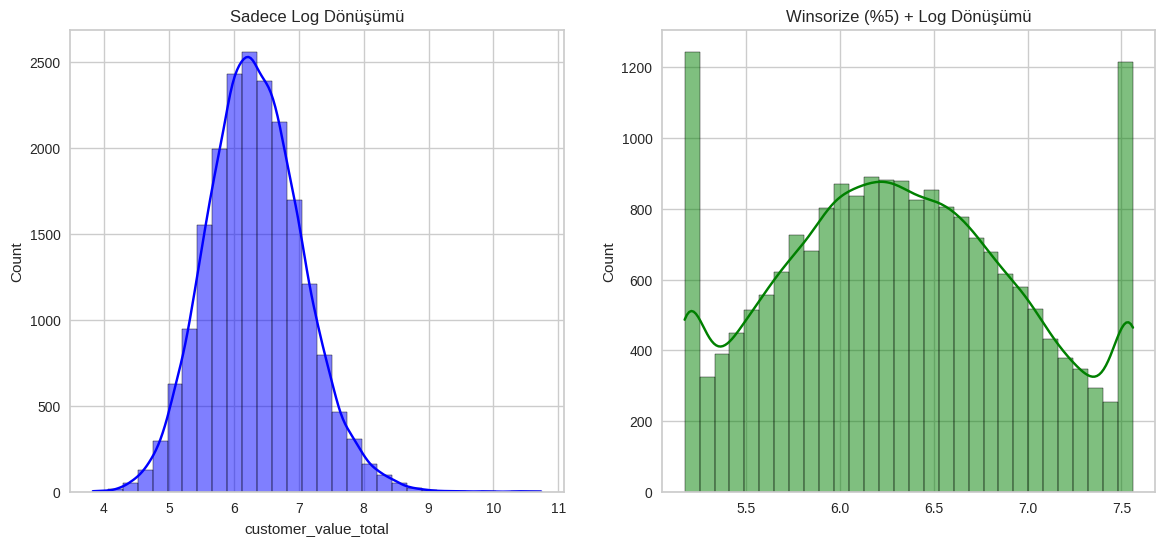

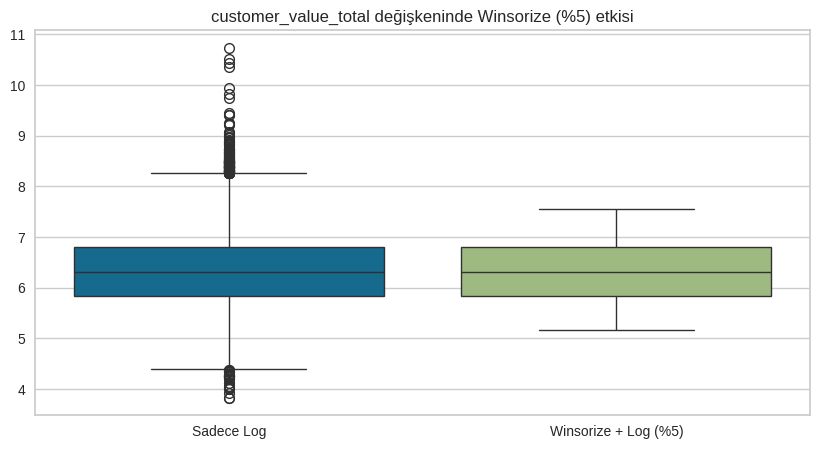

In [ ]:
# İncelenecek sütun
col = "customer_value_total"   # numeric kolonun adını buraya yaz

# Orijinal değer
data_raw = df_main[col]

# Sadece log dönüşümü
data_log = np.log1p(data_raw)

# Winsorize (%5 alt - %5 üst) + log dönüşümü
data_wins = winsorize(data_raw, limits=[0.05, 0.05])   # %5 kırpma
data_wins_log = np.log1p(data_wins)

# Histogram karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.histplot(data_log, bins=30, ax=axes[0], color="blue", kde=True)
axes[0].set_title("Sadece Log Dönüşümü")

sns.histplot(data_wins_log, bins=30, ax=axes[1], color="green", kde=True)
axes[1].set_title("Winsorize (%5) + Log Dönüşümü")

plt.show()

# Boxplot karşılaştırması
plt.figure(figsize=(10,5))
sns.boxplot(data=[data_log, data_wins_log])
plt.xticks([0,1], ["Sadece Log", "Winsorize + Log (%5)"])
plt.title(f"{col} değişkeninde Winsorize (%5) etkisi")
plt.show()

## Winsorize yapıldıktan sonraki scaler + winsorize sonucu

In [ ]:
#MinMax Scaler ile değerleri 0 ile 1 arasına ölçeklendirmiş olduk !
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df = pd.DataFrame(model_scaling, columns=model_df.columns)
model_df.head()

,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity
0,0.64,0.10,0.47,0.70,1.00,0.10
1,0.67,0.91,1.00,1.00,0.35,0.41
2,0.83,0.46,0.47,0.50,0.33,0.04
3,0.74,0.00,0.00,0.00,1.00,0.02
4,0.62,0.61,0.00,0.07,0.03,0.03


# OPTİMUM KÜME SAYISINI BELİRLEME

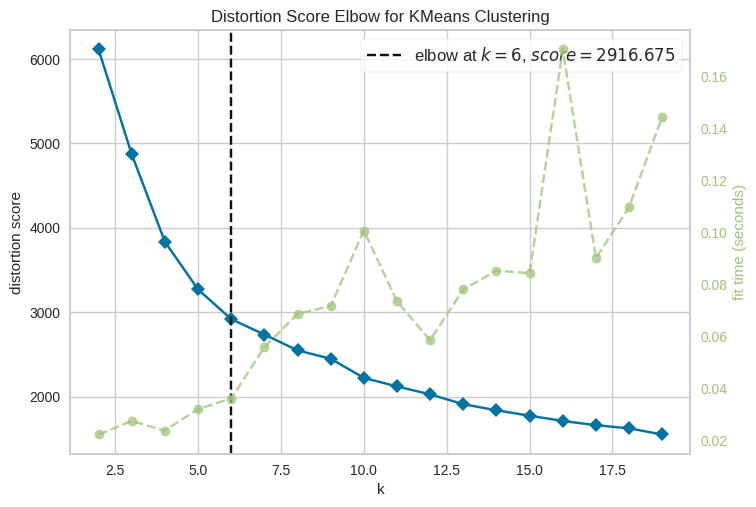

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Optimum küme sayısını belirleme (k=6 geldi)
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

# MODEL OLUŞTURMA VE MÜŞTERİLERİ SEGMENTLEME

In [ ]:
k_means = KMeans(n_clusters=6, random_state=42).fit(model_df)
segments = k_means.labels_
segments

array([0, 4, 1, ..., 2, 1, 3], dtype=int32)

In [ ]:
np.unique(segments)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
# Final dataframe
num_cols = df_copy.select_dtypes(include=["int64", "float64"])
final_df = pd.concat([df_copy[["master_id"]], num_cols], axis=1)

# Segment sütununu ekle
final_df["segment"] = segments

final_df.head()

,master_id,recency,tenure,order_num_total,customer_value_total,purchase_frequency,intensity,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,119,5.00,939.37,0.04,0.05,0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,1469,12.00,1921.94,0.01,0.20,4
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,366,5.00,585.32,0.01,0.03,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,88,2.00,175.48,0.04,0.01,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,582,2.00,209.98,0.00,0.02,3


In [ ]:
# Modelde kullandığımız kolonlar
model_cols = model_df.columns.tolist()
model_cols

['recency',
 'tenure',
 'order_num_total',
 'customer_value_total',
 'purchase_frequency',
 'intensity']

In [ ]:
# Gruplama ve özet istatistik
summary = final_df.groupby("segment")[model_cols].agg(["mean", "min", "max"])
summary

recency          tenure            order_num_total             \
           mean min  max   mean  min   max            mean  min   max   
segment                                                                 
0        160.57   9  335 109.98   88   262            3.09 2.00 11.00   
1        177.45  39  335 690.05  170  1937            4.51 2.00  8.00   
2         27.17   9   67 632.16   94  1937            3.28 2.00  7.00   
3        185.08  36  335 545.83  115  1937            2.47 2.00  5.00   
4        133.73  26  335 969.57   88  1937            8.87 4.00 12.00   
5         17.82   9  209 875.55   88  1937            8.00 2.00 12.00   

        customer_value_total                purchase_frequency            \
                        mean    min     max               mean  min  max   
segment                                                                    
0                     506.72 175.48 1921.94               0.03 0.01 0.04   
1                     686.41 224.95 1921.94               0.01 0.00 0.03   
2                     484.20 175.48 1921.94               0.01 0.00 0.03   
3                     312.04 175.48  859.80               0.01 0.00 0.02   
4                    1329.55 427.25 1921.94               0.01 0.00 0.04   
5                    1227.04 266.70 1921.94               0.01 0.00 0.04   

        intensity            
             mean  min  max  
segment                      
0            0.04 0.01 0.54  
1            0.03 0.01 0.12  
2            0.15 0.03 0.54  
3            0.02 0.01 0.07  
4            0.10 0.02 0.38  
5            0.45 0.20 0.54

In [ ]:
final_df["segment"].value_counts()

,count
segment,
3,5268
1,5081
4,2979
2,2906
5,1962
0,1749


4-5
2-0

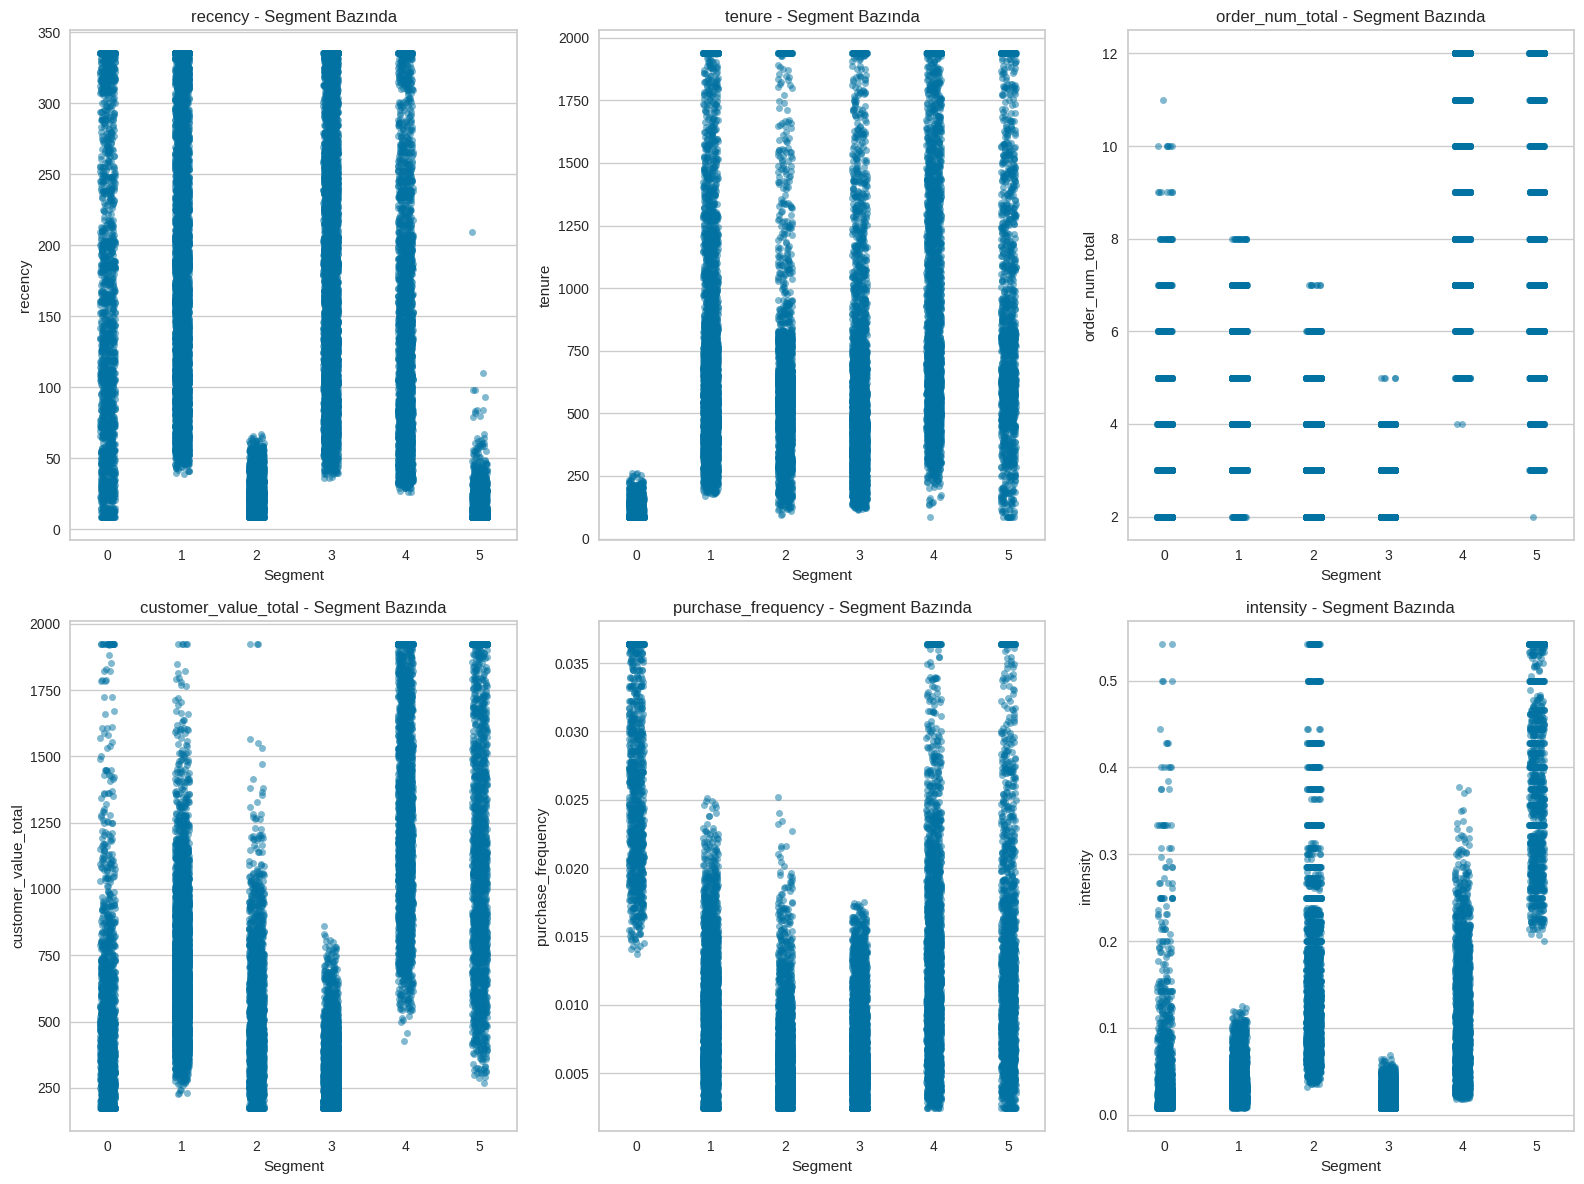

In [ ]:
num_cols = df_copy.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.stripplot(x="segment", y=col, data=final_df, jitter=True, alpha=0.5)
    plt.title(f"{col} - Segment Bazında")
    plt.xlabel("Segment")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

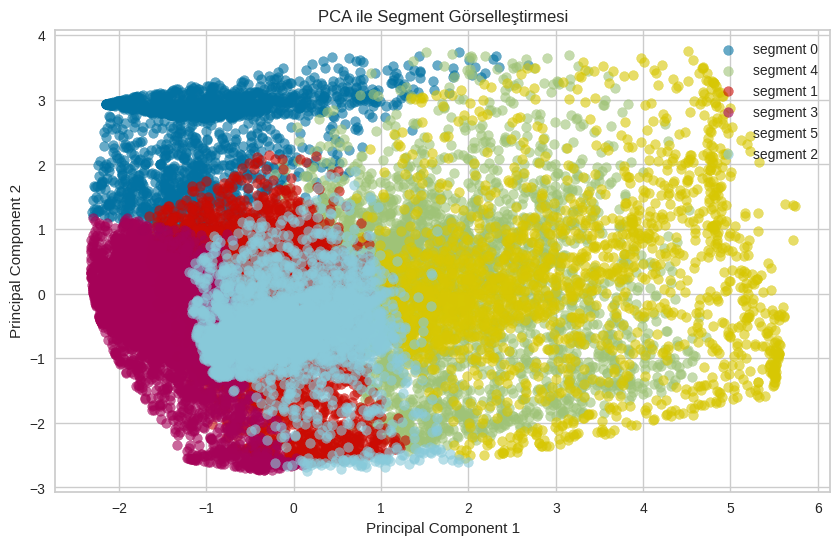

Explained variance ratio: [0.42256821 0.24430382]


In [ ]:
# Örnek: dataframe'inizin ismi df olsun
# df içinde şu sütunlar olmalı:
# recency, tenure, order_num_total, customer_value_total, purchase_frequency, intensity, Segment

features = ["recency", "tenure", "order_num_total", "customer_value_total", "purchase_frequency", "intensity"]

# 1. Özellikleri ayırma
X = final_df[features]
y = final_df["segment"]

# 2. Standardizasyon (PCA öncesi çok önemli)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA uygulama (2 boyuta indiriyoruz)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Yeni dataframe
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["segment"] = y

# 5. Görselleştirme
plt.figure(figsize=(10,6))
for seg in pca_df["segment"].unique():
    plt.scatter(pca_df[pca_df["segment"] == seg]["PC1"],
                pca_df[pca_df["segment"] == seg]["PC2"],
                label=f"segment {seg}", alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA ile Segment Görselleştirmesi")
plt.legend()
plt.show()

# 6. PCA açıklanan varyans
print("Explained variance ratio:", pca.explained_variance_ratio_)


toplamda verinin %66,6’sını açıklar.
PC1 (ilk bileşen): %42,2
PC2 (ikinci bileşen): %24,4

**Net ayrışan gruplar:**

Segment 0 ve Segment 1 → Bunların müşteri profili diğerlerinden farklı.

**Örtüşen gruplar:**

Segment 2, 3 ve 4 → Bazı özelliklerde benzerlikleri var, bu yüzden PCA’da tam ayrışmamışlar.

**Baskın ve geniş dağılan grup:**

Segment 5 → Veri setinde en büyük ve çeşitlilik içeren müşteri grubu.

PCA SONUCUNDA:

Segment 0 (**yeni müşteriler**) ve Segment 5 (**yüksek değerli sadık müşteriler**) oldukça net ayrışmış. Bu pazarlama açısından iki uç grubu hedeflemek için çok kritik bir bulgu.

Segment 2–3–4 arasında örtüşme var; bu segmentlerin bazı kriterlerde benzer olduğu, dolayısıyla farklı stratejiler geliştirmek yerine “benzer kampanyalar” ile yönetilebileceği düşünülebilir.

Segment 1 küçük ama **homojen bir kitleyi** temsil ediyor; muhtemelen uzun süredir müşteriniz olup düşük alışveriş yapan bir grup.


--------------------------------------------------------------------------












frequency - alışveriş sıklığı

aykırı değerler kontrol et

feature extraction yeni sütunlar başka değişkenler

daha detaylı kendin yorumlaya çalış

hiyerarşik kümeleme methodunu da dene aynı şekilde segmentleme mi oluyor kontrol et

threshold belirleyip aykırı değer bak

bilgi kaybetmeden datalar nasıl baskılanır